# Bool
закодировать
# Questions
result_name оставить нул?

# Импорт основных библиотек и датасета

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# graph
import networkx as nx
from pyvis.network import Network

In [2]:
PATHES = ["./with_closed_ations_as________select_app_2018_X5_STORES.csv", "./with_closed_ations_as________select_app_2019_X5_STORES.csv", "./with_closed_ations_as________select_app_2020_X5_STORES.csv"]
# df = pd.read_csv(PATH)
df = pd.DataFrame()
for path in PATHES:
    df1 = pd.read_csv(path)
    df = pd.concat([df, df1])
    
df['action_date'] = pd.to_datetime(df['action_date'])
df = df[df['position_name'] == 'Продавец-кассир']

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# изменение bool значений

In [3]:
df["is_active_action"] = df.is_active_action.replace({True: 1, False: 0})
df["is_open_action"] = df.is_open_action.replace({True: 1, False: 0})
df

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,3080432,2883423,-1,9044,2018-10-16 18:11:10.003180+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
1,2873477,2761171,-1,32087,2018-08-15 10:36:32.936322+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
2,2896621,2776555,-1,32087,2018-08-22 14:09:27.083354+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
3,2906437,2782282,-1,32087,2018-08-24 15:55:27.912704+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
4,2965200,2816229,-1,32087,2018-09-11 15:00:49.242929+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
...,...,...,...,...,...,...,...,...,...,...,...
739675,4825142,2952699,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739676,4736341,936507,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739678,4782853,2753502,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739679,4769924,3823657,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1


# Статистика

In [4]:
df = df[df['is_active_action'] == 1]

In [5]:
# Сортируем по аппликантам и по времени
df.sort_values(by=['id_applicant','action_date'], ascending = [False,True], inplace = True)
df.reset_index(drop = True, inplace = True)

# action_time
indexes = pd.RangeIndex(len(df) - 1)
df['action_time'] = (df.iloc[indexes + 1]['action_date'].reset_index(drop = True) - df['action_date']).dt.total_seconds()/60/60/24 # In days
df['action_time'].iloc[df[df['id_applicant'] !=  df.iloc[indexes+1].append({'id_applicant': 0}, ignore_index = True)['id_applicant'].reset_index(drop = True)].index] = None

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [6]:
# df.iloc[df[(df['result_name']=='Принят') & (df['action_time'].notna())].index]
# & (df['stage_name']=='Оформление'

In [7]:
df['is_fits'] = 0
df.loc[df['result_name'] == 'Принят', 'is_fits'] = 1
df['is_fits'].mean()

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0.018807529887609212

In [8]:
applicants_fits =  df.groupby(['id_applicant'])['is_fits'].sum()
applicants_fits.describe()

count    1.733977e+06
mean     1.161053e-01
std      3.206698e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: is_fits, dtype: float64

In [9]:
df['id_applicant'][df['id_applicant'].isin(applicants_fits[applicants_fits > 2].index)].unique()
# Очень странные значения!!! Когда два раза принимают там в основном второе оформление - после выхода на работу
# Можете смотреть тут
# df[df['id_applicant'].isin([4041842])]

array([2859958], dtype=int64)

In [10]:
df_fits = df[df['id_applicant'].isin(applicants_fits[applicants_fits > 0].index)].reset_index()
df_fits = df_fits[df_fits['is_active_action'] == 1]
df_fits.describe()


,index,id_applicant,id_partner,id_log,department_id,is_active_action,is_open_action,action_time,is_fits
count,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2400247.0,2.400247e+06,2.199099e+06,2.400247e+06
mean,5.329407e+06,3.280235e+06,2.709437e+06,1.577098e+07,2.203810e+04,1.0,6.249357e-06,1.191580e+00,8.387637e-02
std,2.899277e+06,6.037361e+05,6.683275e+05,5.887423e+06,1.214382e+04,0.0,2.499864e-03,7.970328e+00,2.772024e-01
min,0.000000e+00,2.196746e+06,5.305870e+05,-1.000000e+00,5.637000e+03,1.0,0.000000e+00,1.396991e-08,0.000000e+00
25%,2.808272e+06,2.775263e+06,2.497976e+06,1.347877e+07,1.008500e+04,1.0,0.000000e+00,1.080026e-05,0.000000e+00
50%,5.312441e+06,3.290447e+06,2.818420e+06,1.643617e+07,2.406800e+04,1.0,0.000000e+00,9.651384e-05,0.000000e+00
75%,7.814420e+06,3.759099e+06,3.181783e+06,1.967039e+07,3.217700e+04,1.0,0.000000e+00,7.662988e-01,0.000000e+00
max,1.070443e+07,4.886615e+06,3.897229e+06,2.710603e+07,4.985900e+04,1.0,1.000000e+00,8.111587e+02,1.000000e+00


In [11]:
len(df_fits['id_applicant'].unique())

201148

In [12]:
df_fits['Date_int'] = df_fits['action_date'].values.astype('int64')
partner_applicant =  df_fits.groupby(['id_partner','id_applicant'])['Date_int'].max().reset_index()
amount_applicant =  partner_applicant.groupby(['id_partner'])['Date_int'].max().reset_index()
partner_applicant = partner_applicant[partner_applicant['Date_int'].isin(amount_applicant['Date_int'])]

df_fits = df_fits[df_fits['id_applicant'].isin(partner_applicant['id_applicant'])].reset_index(drop = True)

In [13]:
len(df_fits['id_applicant'].unique())

193767

In [14]:
applicant_min =  df_fits.groupby(['id_applicant'])['action_date'].min().reset_index()
fits_min =  df_fits[df_fits['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].max().reset_index()
fits_min

# unused for now
# new_tth = pd.DataFrame(applicant_min).drop(columns = 'action_date')
# new_tth['tth'] = (fits_min['action_date'] - applicant_min['action_date']).dt.total_seconds()/60/60/24

,id_applicant,action_date
0,2196746,2018-02-01 23:04:53.450437+00:00
1,2196747,2018-01-11 09:51:21.213384+00:00
2,2196748,2018-02-02 12:41:49.992103+00:00
3,2196752,2018-01-22 11:43:14.342473+00:00
4,2196753,2018-01-15 10:32:20.674998+00:00
...,...,...
193762,4886560,2020-04-14 11:04:44.553692+00:00
193763,4886575,2020-04-14 11:06:42.313671+00:00
193764,4886579,2020-04-14 11:07:06.756809+00:00
193765,4886599,2020-04-14 11:08:17.306195+00:00


In [15]:
df_fits.loc[df_fits['action_date'].isin(fits_min['action_date']) & (df_fits['action_time'].notna()), 'after_fit'] = 1
while True:
    after_indexes = df_fits[(df_fits['action_time'].notna())& (df_fits['after_fit'] == 1)].index
    after_fit_mask = (df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna())) & df_fits['after_fit'].isna()
    print(len(df_fits.loc[after_fit_mask]))
    if len(df_fits.loc[after_fit_mask]) == 0:
        break
    df_fits.loc[after_fit_mask, 'after_fit'] = 1

244
201
186
172
159
153
70
26
16
16
14
14
10
9
0


In [16]:
# partner_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  partner_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# partner_applicant.set_index('id_partner', inplace = True)
# amount_applicant[amount_applicant['id_applicant']>2]

# amount_applicant['id_partner'][amount_applicant['id_applicant']>2].array

In [17]:
# df_fits.loc[df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna()),'after_fit'] = 1
# ['after_fit']

In [18]:
df_fits.loc[df_fits['after_fit'] == 1, 'action_time'] = 0

In [170]:
df_fits[df_fits['id_applicant']== 4886560]

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits,Date_int,after_fit
40,140,4886560,1197774,-1,35106,2020-04-14 11:04:14.792897+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0,0.000000,0,1586862254792897000,NaN
41,141,4886560,1197774,27105772,35106,2020-04-14 11:04:31.540786+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,1,0,0.000014,0,1586862271540786000,NaN
42,142,4886560,1197774,27105774,35106,2020-04-14 11:04:32.775293+00:00,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000017,0,1586862272775293000,NaN
43,143,4886560,1197774,27105775,35106,2020-04-14 11:04:34.239576+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,1,0,0.000014,0,1586862274239576000,NaN
44,144,4886560,1197774,27105777,35106,2020-04-14 11:04:35.442680+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,1,0,0.000013,0,1586862275442680000,NaN
45,145,4886560,1197774,27105778,35106,2020-04-14 11:04:36.590168+00:00,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,1,0,0.000011,0,1586862276590168000,NaN
46,146,4886560,1197774,27105779,35106,2020-04-14 11:04:37.511006+00:00,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,1,0,0.000015,0,1586862277511006000,NaN
47,147,4886560,1197774,27105781,35106,2020-04-14 11:04:38.764145+00:00,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000017,0,1586862278764145000,NaN
48,148,4886560,1197774,27105783,35106,2020-04-14 11:04:40.266221+00:00,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,1,0,0.000050,0,1586862280266221000,NaN
49,149,4886560,1197774,27105784,35106,2020-04-14 11:04:44.553692+00:00,Оформление,Узнать результаты приема,Принят,Продавец-кассир,1,0,NaN,1,1586862284553692000,NaN


In [20]:
applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum()
applicants_g.describe()

count    193767.000000
mean         13.005490
std          26.229788
min           0.000000
25%           4.304742
50%           7.926343
75%          14.194359
max         811.159243
Name: action_time, dtype: float64

In [21]:
# applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time', 'is_fits'].sum()
# applicants_g[applicants_g['is_fits']>0].describe()

In [22]:
# applicants_g[applicants_g['is_fits']==0].describe()

In [23]:
# df['action_time'][df['action_time'] < 0] = None
stage_threshold = 0
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g[stages_g['count'] > stage_threshold]

,count,mean,std,min,25%,50%,75%,max
stage_name,,,,,,,,
Выход на работу,156.0,1.092758,2.533857,0.000000,0.000000,0.004903,1.224158,21.760230
Гайд-интервью,4.0,0.000011,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013
Групповое собеседование и тестирование,6.0,0.000010,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013
Интервью с руководителем,470750.0,0.563862,9.275355,0.000000,0.000008,0.000011,0.000015,811.158711
Кадровый резерв,4.0,0.000013,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030
Мы отказали,22.0,0.308741,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035
Назначение времени на оформление/медосмотр,205262.0,2.588660,6.868024,0.000000,0.000112,0.815712,3.013660,433.256890
Не прошел СБ,382.0,0.022709,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623
Обработка,348531.0,0.172193,6.452844,0.000000,0.000009,0.000011,0.000014,565.056308


In [24]:
activity_threshold = 0
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g[activities_g['count'] > activity_threshold]

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000022,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.241734,5.549731e+00,0.000000,0.000132,0.226812,2.831923,433.256890
Назначить время на оформление/медосмотр (недозвон),124348.0,2.979320,7.469298e+00,0.000000,0.000076,0.828630,3.230943,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.626637,9.179090e+00,0.000000,0.000009,0.000011,0.000015,811.158711
Подготовить анкету кандидата,220390.0,1.376653,1.224314e+01,0.000000,0.000013,0.175961,0.832853,527.944208


In [25]:
result_threshold = 0
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
results_g[results_g['mean'] > 1]

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В ожидании,153482.0,3.158289,5.908128,0.000000,1.016673,1.918097,3.894268,520.710384
Время назначено,191517.0,1.840695,4.353546,0.000000,0.000073,0.000276,2.811733,291.880512
Кадровый резерв,197.0,1.882064,7.805397,0.000008,0.000009,0.000011,0.000013,72.072166
Направлен на медосмотр,7438.0,4.059084,6.214250,0.000035,1.740861,2.116287,4.021579,148.137375
Не подходит,454.0,30.973591,49.373907,0.000021,9.190021,17.501866,32.610084,467.791808
Не получено,24.0,1.907678,2.560172,0.007971,0.077342,0.760203,2.788345,9.012896
Не принят,14.0,25.042870,38.841320,0.000000,7.308831,13.095907,28.450503,154.034348
Недозвон,143693.0,3.380745,9.124365,0.000000,0.249755,1.027225,3.153722,561.365339
Нет обратной связи,22849.0,3.343687,20.052129,0.000000,0.176681,0.923860,1.996873,532.894660


# Обнуляем время в результатах без предсказуемой последующей обработки

In [26]:
# Недозвон? Нет обратной связи? Ожидание?
results_empty = ['Резерв', 'Не подходит', 'Не принят', 'Отказ кандидата', 'Отказ руководителя', 'Принят', 'Резерв', 'Кадровый резерв']
for res in results_empty:
    df_fits.loc[(df_fits['result_name'] == res) & df_fits['action_time'].notna(), 'action_time'] = 0
    
df_fits.loc[(df_fits['stage_name'] == 'Создание кандидата') & df_fits['action_time'].notna(), 'action_time'] = 0

In [27]:
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g['sum'] = stages_g['mean'] * stages_g['count']
stages_g

,count,mean,std,min,25%,50%,75%,max,sum
stage_name,,,,,,,,,
Выход на работу,156.0,1.078194,2.533568,0.000000,0.000000,0.004620,1.185274,21.760230,168.198321
Гайд-интервью,4.0,0.000011,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013,0.000044
Групповое собеседование и тестирование,6.0,0.000010,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013,0.000062
Интервью с руководителем,470750.0,0.554103,9.122335,0.000000,0.000008,0.000011,0.000015,618.209540,260843.799030
Кадровый резерв,4.0,0.000013,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030,0.000054
Мы отказали,22.0,0.308741,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035,6.792300
Назначение времени на оформление/медосмотр,205262.0,2.538058,6.628507,0.000000,0.000106,0.803150,2.998456,430.056809,520966.805882
Не прошел СБ,382.0,0.022709,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623,8.674995
Обработка,348531.0,0.163508,6.332038,0.000000,0.000009,0.000011,0.000014,565.056308,56987.699728


In [90]:
# df_fits[df_fits['id_applicant']==4146514]

In [89]:
# df_fits[df_fits['activity_name']=='Узнать результаты медосмотра']

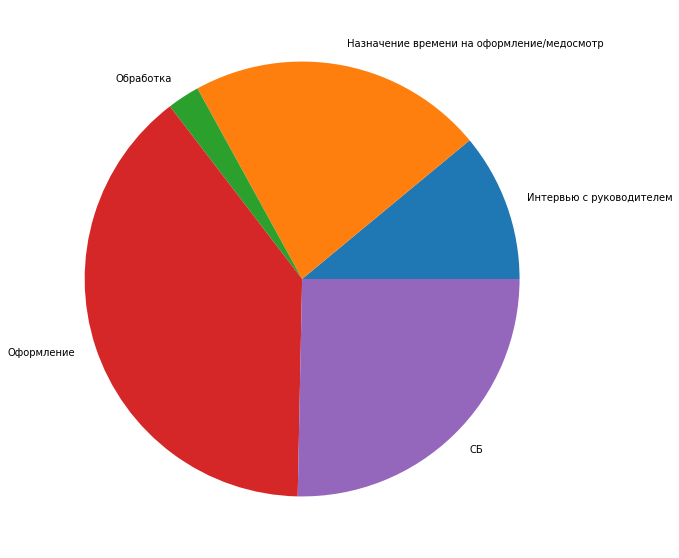

In [64]:
stage_pie_mask = stages_g['sum'] > 2200
stage_sum =stages_g[stage_pie_mask]['sum'].sum()
stage_sum

y = stages_g[stage_pie_mask]['sum'] / stage_sum
mylabels = stages_g[stage_pie_mask].index

plt.subplots(1, 1,figsize=(15,10))
plt.pie(y, labels = mylabels)
plt.show() 

In [91]:
# df_stage_activ = df_fits.dropna(subset=['action_time']).groupby(['stage_name', 'activity_name']).describe().reset_index
# df_stage_activ[]

In [92]:
# df_stage_result = df_fits.dropna(subset=['action_time']).groupby(['stage_name', 'result_name']).count().reset_index()
# df_stage_result[df_stage_result['stage_name']=='Оформление']

In [182]:
# nedozvon = df_fits[['id_applicant','action_date', 'action_time']][(df_fits['result_name'] == 'Недозвон')]
# nedozvon['action_date'] = nedozvon['action_date'].dt.tz_localize(None)
# nedozvon.to_excel('Nedozvon.xlsx')
sum_time_med_c = 3
sum_time_medN_c = 3
sum_time_res_c = 3
df_med = df_fits[(df_fits['activity_name'] == 'Назначить время на оформление/медосмотр')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med.columns = df_med.columns.droplevel(1)
df_med = df_med.drop('activity_name', axis=1)
df_med.columns.values[1] = "sum_time_med"
df_med.columns.values[2] = "count_time_med"
print(len(df_med))
df_med2 = df_fits[(df_fits['activity_name'] == 'Назначить время на оформление/медосмотр (недозвон)')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med2.columns = df_med2.columns.droplevel(1)
df_med2 = df_med2.drop('activity_name', axis=1)
df_med2.columns.values[1] = "sum_time_medN"
df_med2.columns.values[2] = "count_time_medN"
print(len(df_med2))
df_med =  pd.merge(df_med, df_med2, how = 'outer', on="id_applicant")
df_med2 = df_fits.dropna(subset=['action_time'])[(df_fits['activity_name'] == 'Узнать результаты приема')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med2.columns = df_med2.columns.droplevel(1)
df_med2 = df_med2.drop('activity_name', axis=1)
df_med2.columns.values[1] = "sum_time_res"
df_med2.columns.values[2] = "count_time_res"
print(len(df_med2))
df_med =  pd.merge(df_med, df_med2, how = 'outer', on="id_applicant")
df_med['sum_time_med(short)'] = df_med['sum_time_med']
df_med.loc[(df_med['sum_time_med(short)']>sum_time_med_c), 'sum_time_med(short)'] = sum_time_med_c
df_med['sum_time_medN(short)'] = df_med['sum_time_medN']
df_med.loc[df_med['sum_time_medN(short)']>sum_time_medN_c, 'sum_time_medN(short)'] = sum_time_medN_c
df_med['sum_time_res(short)'] = df_med['sum_time_res']
df_med.loc[df_med['sum_time_res(short)']>sum_time_res_c, 'sum_time_res(short)'] = sum_time_res_c
df_med.to_excel('med_time.xlsx')

185069
80014


C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


80988


In [32]:
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
# results_g
results_g

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В белый список,4.0,0.000259,0.000101,0.000114,0.000234,0.000286,0.000310,0.000349
В ожидании,153482.0,3.158289,5.908128,0.000000,1.016673,1.918097,3.894268,520.710384
Время назначено,191517.0,1.840695,4.353546,0.000000,0.000073,0.000276,2.811733,291.880512
Встреча назначена,224659.0,0.594591,8.826268,0.000000,0.000009,0.000011,0.000015,600.796568
Интервью с руководителем,482.0,0.507145,5.623006,0.000016,0.000107,0.000176,0.000488,113.246137
Источник Яндекс Цифра,27.0,0.496732,1.423606,0.000011,0.000198,0.034347,0.086146,7.030999
Источник не Яндекс Цифра,45338.0,0.144579,5.950515,0.000000,0.000011,0.000013,0.000017,469.080663
Кадровый резерв,197.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Назначить время на оформление/медосмотр,3179.0,0.302307,2.244807,0.000000,0.000129,0.000187,0.000383,38.193814


In [66]:
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000000,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.228467,5.390705e+00,0.000000,0.000131,0.221104,2.827222,430.056809
Назначить время на оформление/медосмотр (недозвон),124348.0,2.915728,7.302221e+00,0.000000,0.000071,0.809676,3.174616,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.617507,8.965768e+00,0.000000,0.000009,0.000011,0.000015,600.796568
Подготовить анкету кандидата,220390.0,1.376653,1.224314e+01,0.000000,0.000013,0.175961,0.832853,527.944208


In [117]:
df_tth =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum().reset_index()
df_tth.rename(columns={"action_time": "TTH"}, inplace = True)
# df_tth['TTH'].to_excel('TTH.xlsx')
df_tth.describe()

,id_applicant,TTH
count,1.937670e+05,193767.000000
mean,3.253116e+06,12.248891
std,6.243072e+05,24.546621
min,2.196746e+06,0.000000
25%,2.730766e+06,4.044678
50%,3.192514e+06,7.503005
75%,3.740477e+06,13.963320
max,4.886615e+06,626.053685


In [118]:
df_tth_dep =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'department_id'])['action_time'].count().reset_index()
df_tth_dep = df_tth_dep.join(df_tth.set_index('id_applicant'), on='id_applicant')
df_tth_dep = df_tth_dep.groupby(['department_id'])['TTH'].median().reset_index()
# df_tth_dep.to_excel('TTH_DEP.xlsx')
df_tth_dep.describe()

,department_id,TTH
count,15550.000000,15550.000000
mean,22926.999293,8.874650
std,13317.867234,7.331800
min,5637.000000,0.000000
25%,9945.250000,6.063168
50%,24309.000000,7.785139
75%,32716.750000,10.534785
max,49859.000000,462.117984


In [61]:
df_tth_dep['TTH'].quantile(.999)

56.877911979162576

In [62]:
def SetTTHLabels(table_name = 'TTH'):
    ax.set_title(table_name)
    ax.set_xlabel('TTH')
    ax.set_ylabel('Количество')

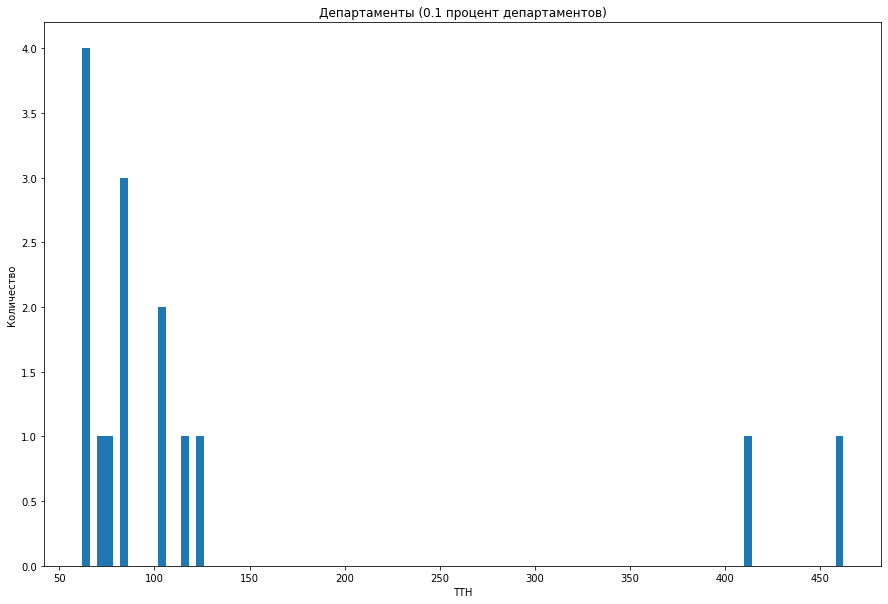

In [63]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 100
ax.hist(df_tth_dep['TTH'][(df_tth_dep['TTH']>60)],bins=bins)
SetTTHLabels('Департаменты (0.1 процент департаментов)')
plt.show()

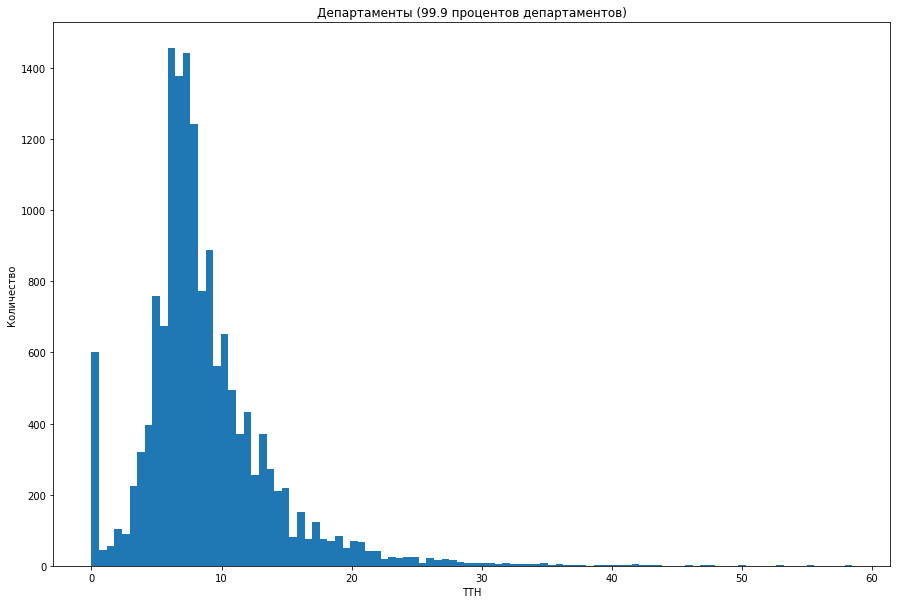

In [64]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 100
ax.hist(df_tth_dep['TTH'][(df_tth_dep['TTH']<=60)],bins=bins)
SetTTHLabels('Департаменты (99.9 процентов департаментов)')
plt.show()

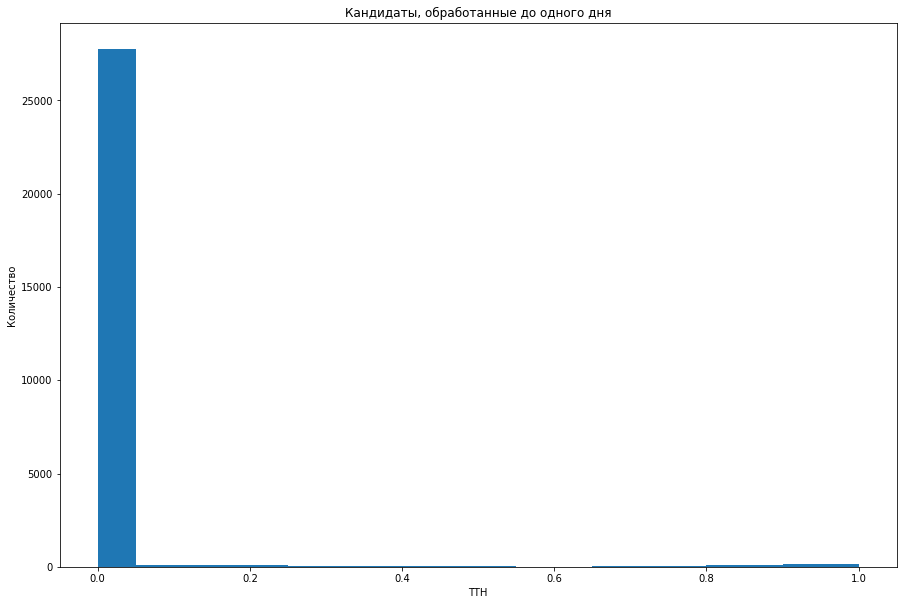

In [65]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 20
ax.hist(df_tth['TTH'][(df_tth['TTH']<=1)],bins=bins)
SetTTHLabels('Кандидаты, обработанные до одного дня')
plt.show()

In [66]:
df_fits[df_fits['id_applicant'] == 2205452]

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits,Date_int,after_fit
2312137,10661400,2205452,2383932,-1,18320,2018-01-10 11:04:22.146798+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0,0.000000,0,1515582262146798000,NaN
2312138,10661401,2205452,2383932,10926262,18320,2018-01-10 11:04:39.627355+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,1,0,0.000010,0,1515582279627355000,NaN
2312139,10661402,2205452,2383932,10926264,18320,2018-01-10 11:04:40.480493+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,1,0,0.000008,0,1515582280480493000,NaN
2312140,10661403,2205452,2383932,10926265,18320,2018-01-10 11:04:41.204036+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,1,0,0.000010,0,1515582281204036000,NaN
2312141,10661404,2205452,2383932,10926267,18320,2018-01-10 11:04:42.109865+00:00,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,1,0,0.000010,0,1515582282109865000,NaN
2312142,10661405,2205452,2383932,10926268,18320,2018-01-10 11:04:42.985227+00:00,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,1,0,0.000010,0,1515582282985227000,NaN
2312143,10661406,2205452,2383932,10926272,18320,2018-01-10 11:04:43.875643+00:00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0,0.000042,0,1515582283875643000,NaN
2312144,10661407,2205452,2383932,10926283,18320,2018-01-10 11:04:47.505830+00:00,Оформление,Узнать результаты приема,Принят,Продавец-кассир,1,0,NaN,1,1515582287505830000,NaN


In [67]:
df_tth[(df_tth['TTH']<0.0001)]

,id_applicant,TTH
408,2202559,0.000099
600,2205427,0.000094
602,2205452,0.000091
611,2205493,0.000099
613,2205532,0.000090
...,...,...
193263,4871200,0.000099
193269,4871337,0.000092
193272,4871391,0.000099
193284,4871711,0.000099


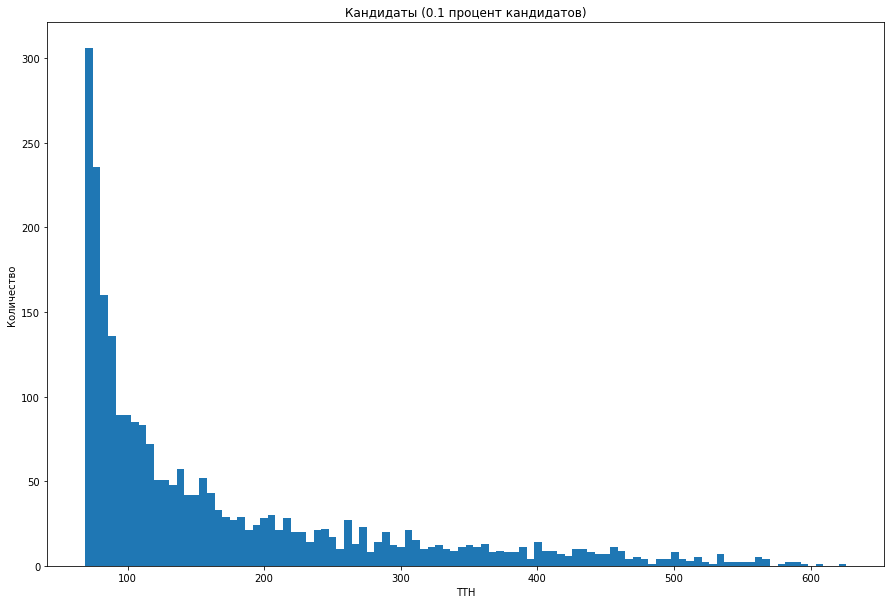

In [68]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.hist(df_tth['TTH'][(df_tth['TTH']<5000)&(df_tth['TTH']>69)],bins=100)
SetTTHLabels('Кандидаты (0.1 процент кандидатов)')
plt.show()

In [69]:
# df_fits

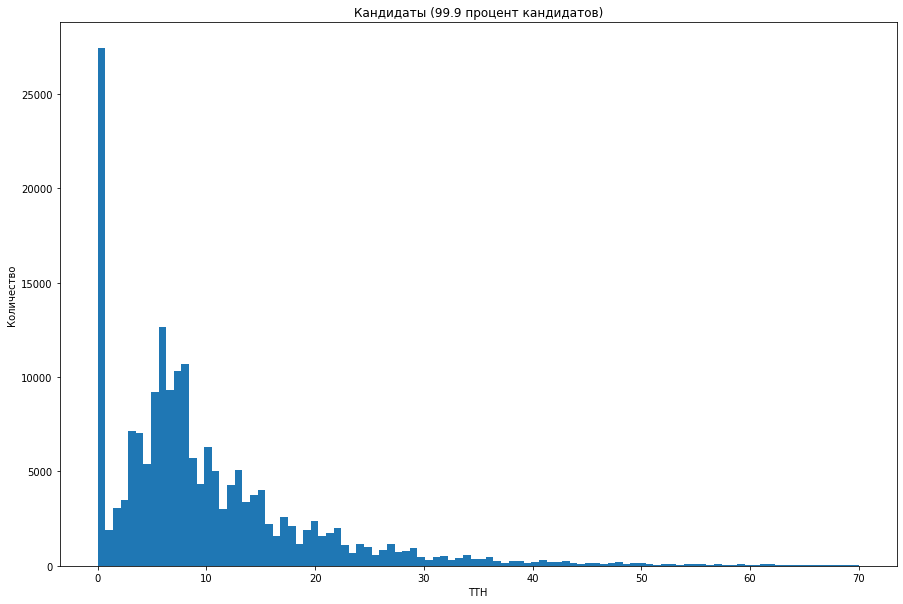

In [70]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.hist(df_tth['TTH'][(df_tth['TTH']<70)& (df_tth['TTH']>0)], bins = 100)
SetTTHLabels('Кандидаты (99.9 процент кандидатов)')
plt.show()

In [71]:
df_fits['action_time'].quantile(.999)

68.2677492796434

In [72]:
df_tth['TTH'][df_tth['TTH']>100]

78        473.820724
129       134.243540
174       533.154021
187       370.023845
312       173.923378
             ...    
149411    100.938892
150358    105.030456
151363    106.354237
151727    106.162903
153141    112.194402
Name: TTH, Length: 1551, dtype: float64

In [73]:
# stage_name = 'Интервью с руководителем'
# stage_series = df_fits['action_time'][df_fits['stage_name'] == stage_name]
# time_threshold = stages_g.loc[stage_name]['75%']

# df.iloc[stage_series[stage_series.values > time_threshold].index]

In [74]:
# amount_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  amount_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# amount_applicant[amount_applicant['id_applicant']>3]

In [75]:
# df.iloc[df[df['stage_name'] == 'Групповое собеседование и тестирование'].index+1]
# print(len(stages[stages['count'] > stage_threshold]))
# df.iloc[df[df['action_time'] < 0].index + 1]
# df[df['activity_name'] == 'Провести первичную обработку']

In [76]:
df_min_date =df_fits.groupby(['id_applicant'])['action_date'].min().reset_index()
df_cohort = df_min_date.join(df_tth.set_index('id_applicant'), on='id_applicant')

<AxesSubplot:xlabel='weeks'>

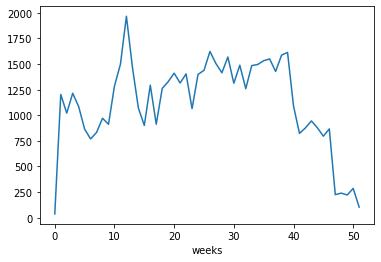

In [86]:
date2018 = df_cohort['action_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
df_cohort['weeks'] = (df_cohort['action_date'] - date2018).dt.days
df_cohort['weeks'] = (df_cohort['weeks'] % 365 / 7).astype(int)
df_cohort['TTH_int'] = (df_cohort['TTH']/7).astype(int)
df_cohort[(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
retention_pivot = pd.DataFrame(df_cohort.pivot_table(index='weeks',
                                        columns='TTH_int',
                                        values='TTH',
                                        aggfunc='count'))
# [(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
retention_pivot
retention_pivot[1].plot()
# retention_pivot[1].index + 1

In [127]:
retention_pivot = pd.DataFrame(df_cohort.pivot_table(index='weeks',
                                        columns='TTH_int',
                                        values='TTH',
                                        aggfunc='count'))
# [(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot.to_excel('cohort.xlsx')
# retention_pivot[1].plot()
# retention_pivot[1].index + 1

In [175]:
retention_pivot[1]

days
0       37.0
1     1203.0
2     1021.0
3     1215.0
4     1085.0
5      865.0
6      769.0
7      833.0
8      971.0
9      912.0
10    1286.0
11    1499.0
12    1967.0
13    1473.0
14    1072.0
15     901.0
16    1294.0
17     913.0
18    1262.0
19    1328.0
20    1411.0
21    1315.0
22    1404.0
23    1065.0
24    1399.0
25    1439.0
26    1623.0
27    1505.0
28    1415.0
29    1569.0
30    1313.0
31    1489.0
32    1260.0
33    1485.0
34    1496.0
35    1533.0
36    1550.0
37    1428.0
38    1587.0
39    1614.0
40    1091.0
41     823.0
42     877.0
43     945.0
44     878.0
45     796.0
46     867.0
47     225.0
48     240.0
49     222.0
50     286.0
51     103.0
Name: 1, dtype: float64

In [142]:
# df_cohort['TTH_int'].max()
# pd.DataFrame(20180101)

date = pd.to_datetime(20180101, format='%Y%m%d')
date = df_cohort['action_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
date
# df_cohort['action_date'].min().tzinfo

Timestamp('2018-01-01 00:00:00+0000', tz='UTC')

In [84]:
import matplotlib.pyplot as plt

def showHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    fig, axs = plt.subplots(xy, xy, figsize=(20,15))
    i = 0
    not_special_const = 5
    
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        time_threshold = not_special_const
        if is_special and col in grouped_data.index:
            time_threshold = grouped_data.loc[col]['75%']
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            i+=1
#             axs[x,y].set_ylabel('Кол-во')
            axs[x,y].set_xlabel(f'{col}, {col_len}')
            series[series.values < time_threshold].hist(ax=axs[x,y],bins=100)
        print('.', end = '')
    plt.show()

def checkShowHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    not_special_const = 5
    if is_special and len(data[column_name].unique()) != len(grouped_data):
        print('Not all columns in grouped_data')
    
    i = 0
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            if x > xy or y > xy:
                print(f'Too many columns in data for diagramm {xy}*{xy}')                
            i+=1

................

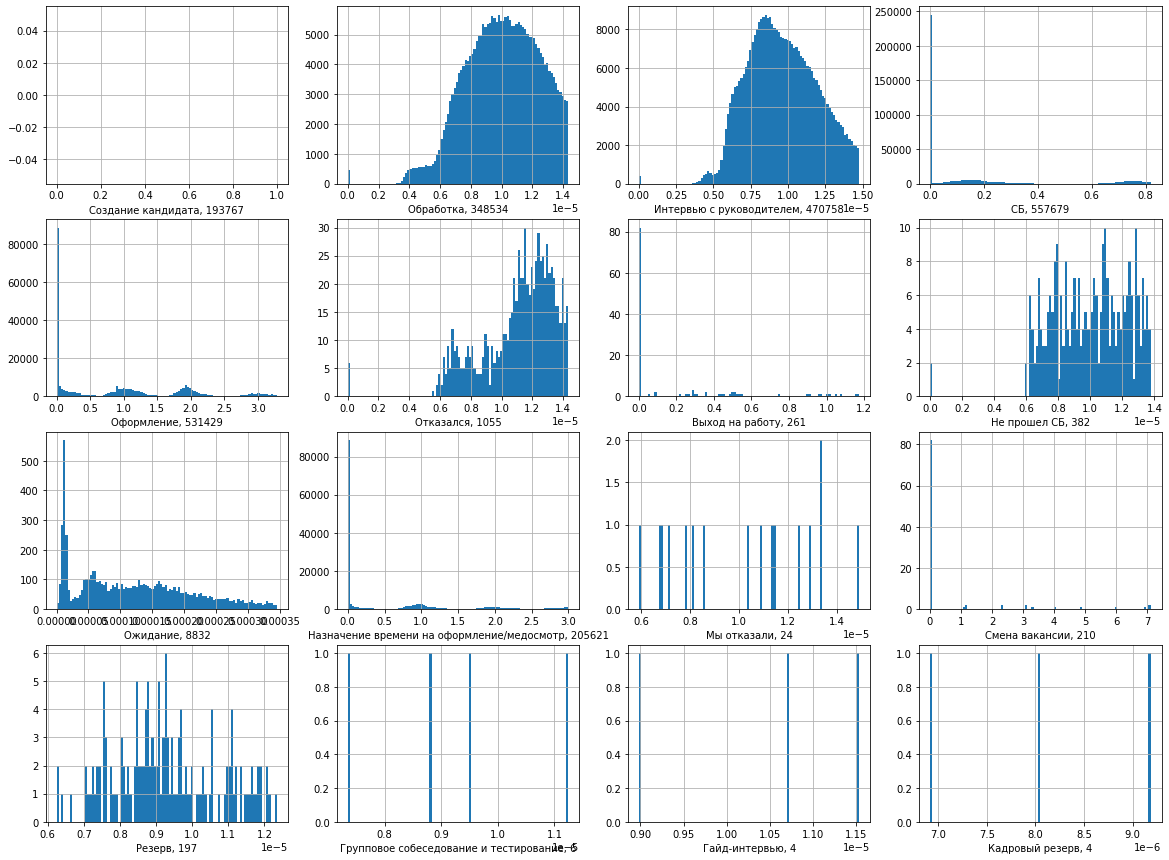

In [85]:
showHist(df_fits, stages_g, 'stage_name', stage_threshold)

.................

IndexError: index 4 is out of bounds for axis 0 with size 4

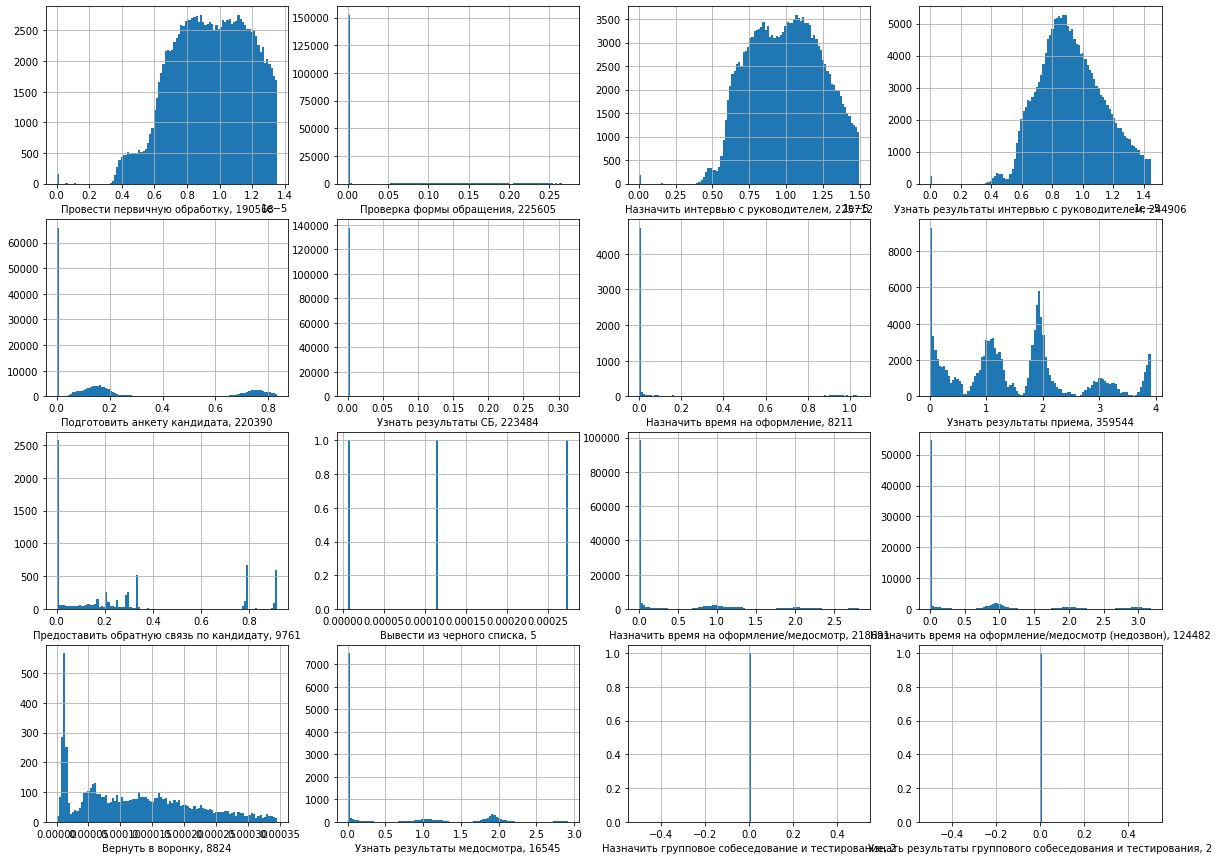

In [86]:
showHist(df_fits, activities_g, 'activity_name', activity_threshold, True)

.....................................

IndexError: index 6 is out of bounds for axis 0 with size 6

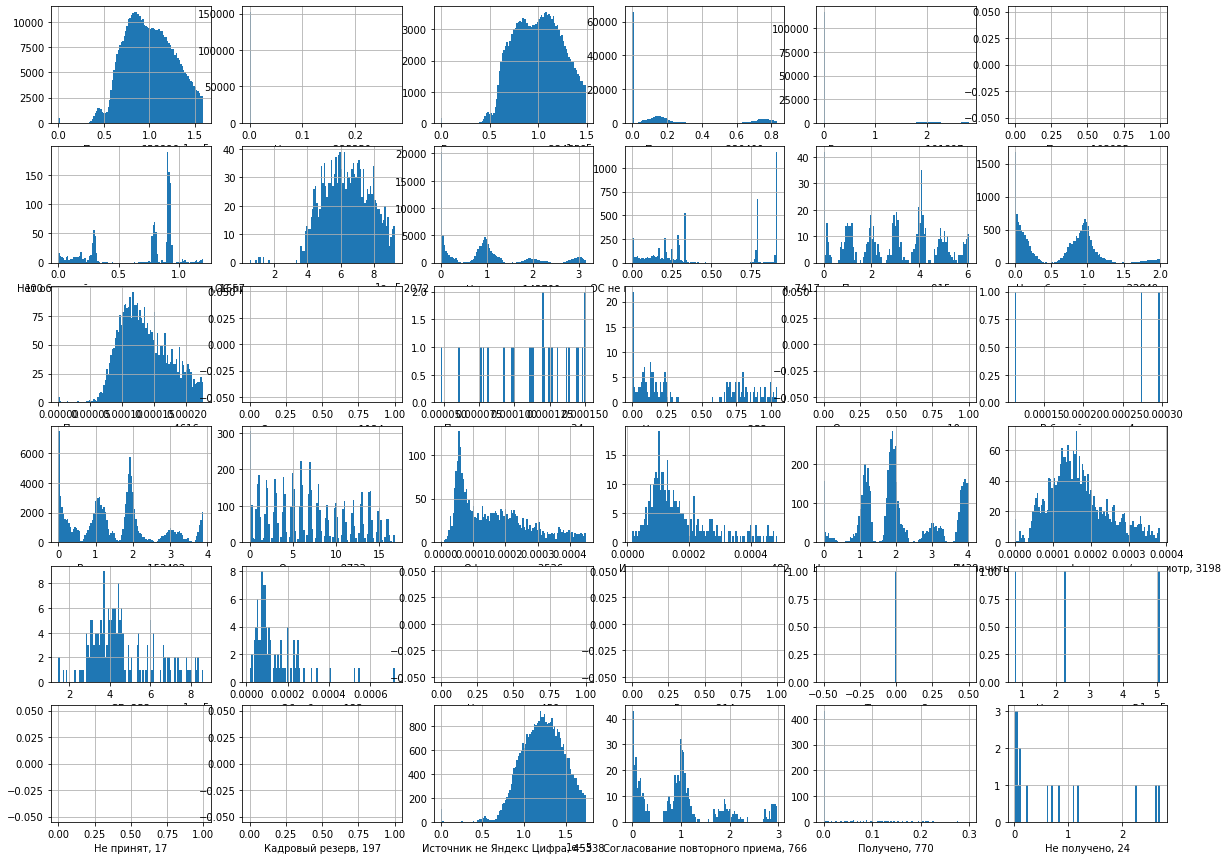

In [87]:
showHist(df_fits, results_g, 'result_name', result_threshold, True, 6)

# Замечание! 
заменить float значения колонки next_id на int

In [14]:
#df2020["next_id"] = df2020["next_id"].astype(int) # пишет что не может NaN сконвертить в инт, тут надо подумать

In [31]:
по stage_name других годов

array(['Создание кандидата', 'СБ', 'Обработка',
       'Назначение времени на оформление/медосмотр',
       'Интервью с руководителем', 'Оформление', 'Смена вакансии',
       'Отказался', 'Ожидание', 'Резерв', 'Не прошел СБ', 'Мы отказали',
       'Выход на работу', 'Кадровый резерв', 'Черный список',
       'Гайд-интервью', 'Групповое собеседование и тестирование',
       'Выход состоялся'], dtype=object)

In [34]:
по stage_name 2020

array(['Создание кандидата', 'Интервью с руководителем', 'Обработка',
       'Оформление', 'Смена вакансии', 'СБ', 'Не прошел СБ', 'Отказался',
       'Мы отказали', 'Резерв', 'Выход на работу', 'Черный список'],
      dtype=object)